# Validation Results Camara Compton Simulation

__Author: Antonio Gómez Carrera__

In [1]:
import ROOT

Welcome to JupyROOT 6.30/02


Import the file

In [2]:
file = ROOT.TFile('validation5.root')

Parameters used:

```
    _world_width = 682*mm;
    _world_height = 562*mm;
    _world_depth = 354*mm;

    _detector_size = 300*mm;
    _detector_thickness = 150*um;
    _detector_number = 2;
    
    _detector_distance[1] = 100*mm;
    _detector_distance[2] = 200*mm;
    
    Particle_Energy = 70keV

```

Beam of 5000000 particles

Physic lists:
* EmStandarPhysics_option4
* DecayPhysics


### Events

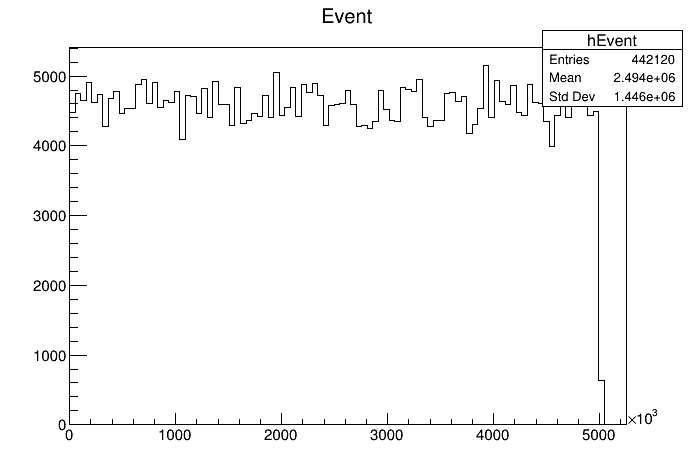

In [3]:
c = ROOT.TCanvas()
hEvent = file.Hits.Draw("Event>>hEvent()","","")
c.Draw()


### Particle ID

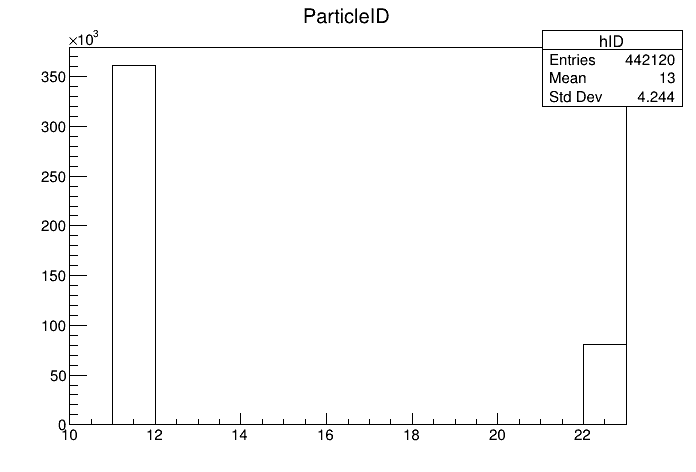

In [4]:
c1 = ROOT.TCanvas()
#hPartID = file.Hits.Draw("ParticleID>>hID(14,9.5,23.5)","","")
file.Hits.Draw("ParticleID>>hID","","")
c1.Draw()

11-> e-

22 -> Photons

### Detector ID

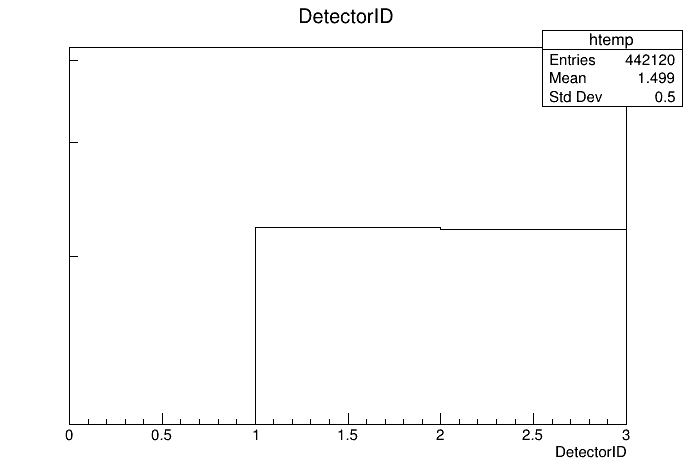

In [5]:
c2 = ROOT.TCanvas()
c2.SetLogy()
file.Hits.Draw("DetectorID","","")

c2.Draw()

### Process name

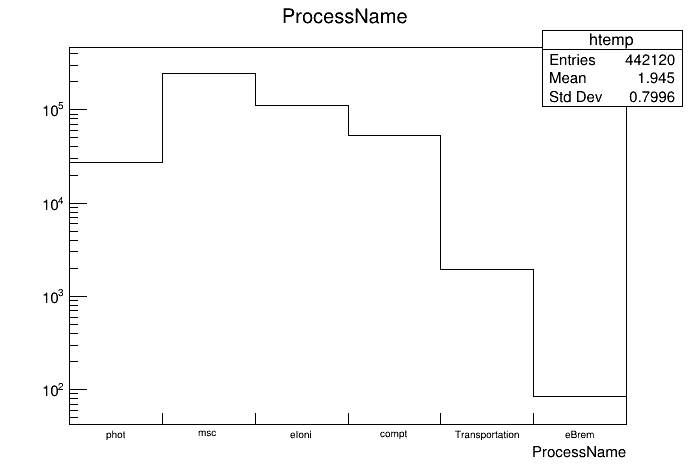

In [6]:
c2 = ROOT.TCanvas()
c2.SetLogy()
file.Hits.Draw("ProcessName","","")
c2.Draw()

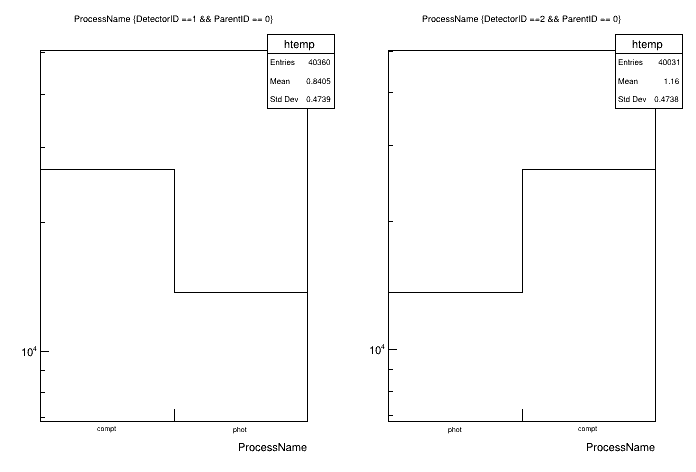

In [7]:
c2a = ROOT.TCanvas()
c2a.Divide(2,1)
c2a.cd(1)
c2a.cd(1).SetLogy()
file.Hits.Draw("ProcessName","DetectorID ==1 && ParentID == 0","")
c2a.cd(2)
c2a.cd(2).SetLogy()
file.Hits.Draw("ProcessName","DetectorID ==2 && ParentID == 0","")
c2a.Draw()


### Position

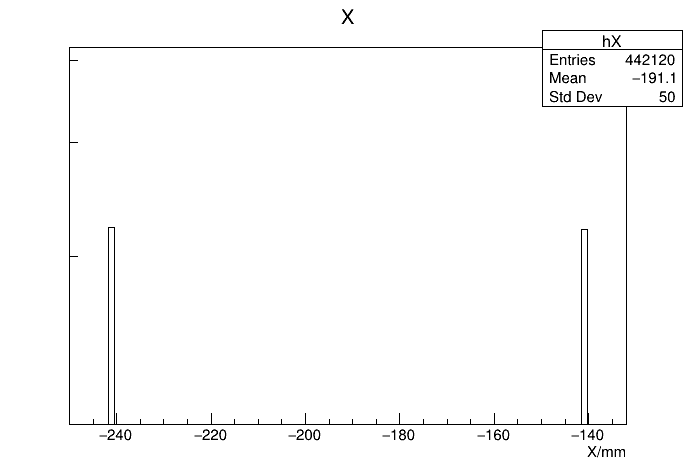

In [8]:
c3 = ROOT.TCanvas()
c3.SetLogy()
file.Hits.Draw("X>>hX()", "", "HIST")
hX = ROOT.gDirectory.Get("hX")
hX.GetXaxis().SetTitle('X/mm')
c3.Draw()

Hits in the first detector of the incidente particles should be at Y=0, Z=0 but it is seen a dispersion, why?

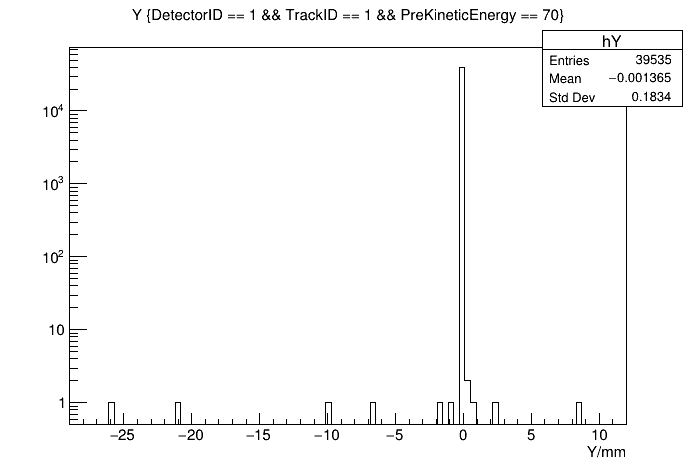

In [9]:
c4 = ROOT.TCanvas()
c4.SetLogy()
file.Hits.Draw("Y>>hY", "DetectorID == 1 && TrackID == 1 && PreKineticEnergy == 70","")
hY = ROOT.gDirectory.Get("hY")
hY.GetXaxis().SetTitle('Y/mm')
c4.Draw()



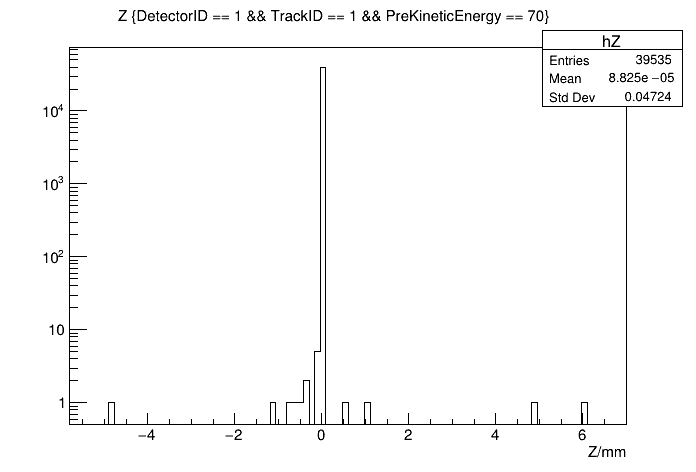

In [10]:
c5 = ROOT.TCanvas()
c5.SetLogy()
file.Hits.Draw("Z>>hZ", "DetectorID == 1 && TrackID == 1 && PreKineticEnergy == 70","")
hZ = ROOT.gDirectory.Get("hZ")
hZ.GetXaxis().SetTitle('Z/mm')
c5.Draw()


Check Validation_galactic.ipynb to see if the dispersion is caused by the air between source and detector

### Pre-Momentum

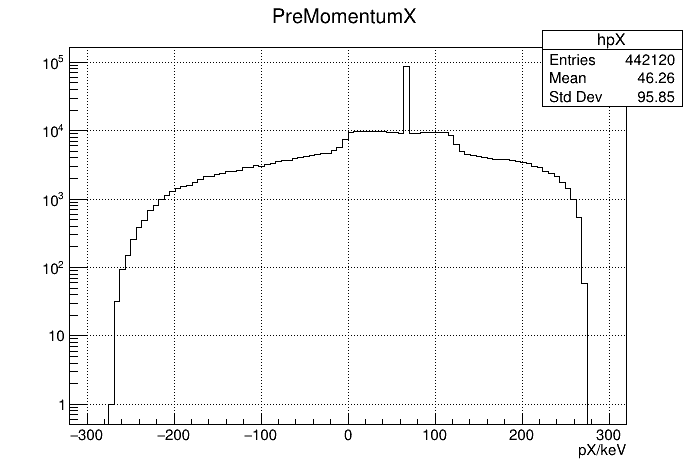

In [11]:
c6 = ROOT.TCanvas()
c6.SetLogy()
c6.SetGrid()
file.Hits.Draw("PreMomentumX>>hpX", "","")
hpX = ROOT.gDirectory.Get("hpX")
hpX.GetXaxis().SetTitle('pX/keV')
c6.Draw()

Premomentum in x coordinate should be 70keV for all generated particles and 0 in Y and Z. 

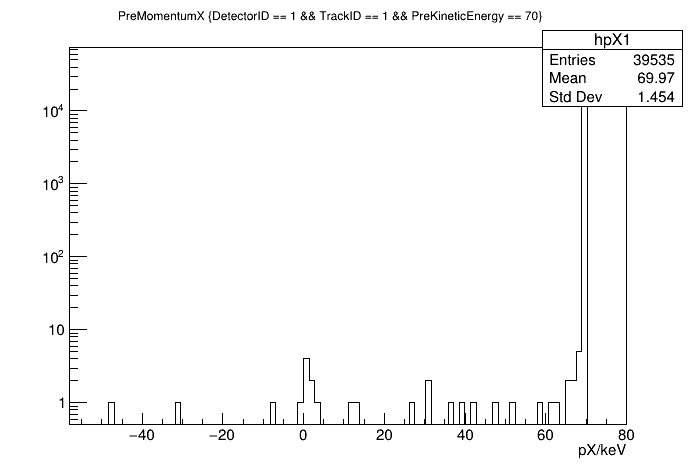

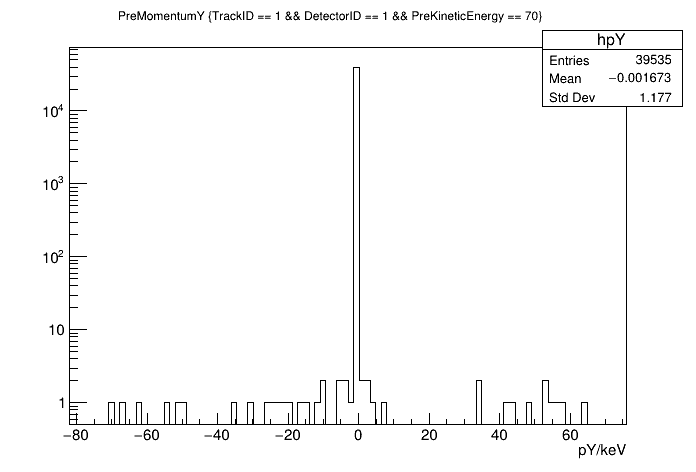

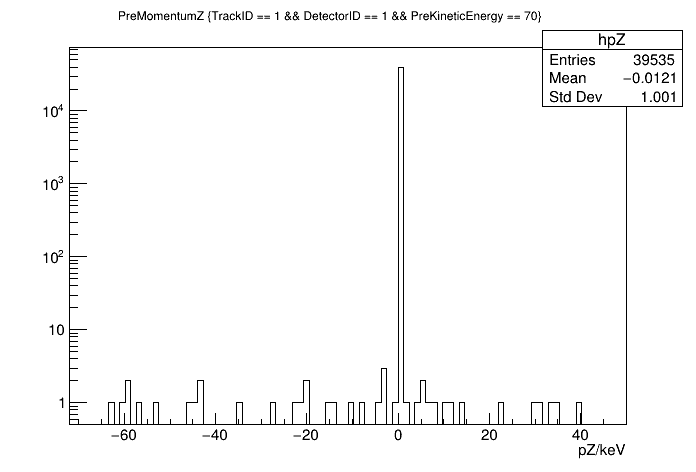

In [12]:
c7 = ROOT.TCanvas()
c7.SetLogy()
file.Hits.Draw("PreMomentumX>>hpX1","DetectorID == 1 && TrackID == 1 && PreKineticEnergy == 70", "")
hpX1 = ROOT.gDirectory.Get("hpX1")
hpX1.GetXaxis().SetTitle('pX/keV')
c7.Draw()

c8 = ROOT.TCanvas()
c8.SetLogy()
file.Hits.Draw("PreMomentumY>>hpY()", "TrackID == 1 && DetectorID == 1 && PreKineticEnergy == 70","")
hpY = ROOT.gDirectory.Get("hpY")
hpY.GetXaxis().SetTitle('pY/keV')
c8.Draw()

c9 = ROOT.TCanvas()
c9.SetLogy()
file.Hits.Draw("PreMomentumZ>>hpZ()", "TrackID == 1 && DetectorID == 1 && PreKineticEnergy == 70","")
hpZ = ROOT.gDirectory.Get("hpZ")
hpZ.GetXaxis().SetTitle('pZ/keV')
c9.Draw()

Is the dispersion due to particles that need more time to arrive?

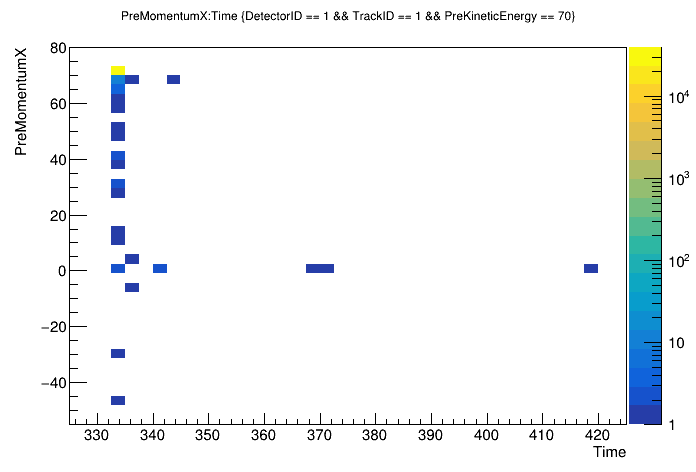

In [13]:
c7a = ROOT.TCanvas()
c7a.SetLogz()
file.Hits.Draw("PreMomentumX:Time","DetectorID == 1 && TrackID == 1 && PreKineticEnergy == 70", "Colz")
c7a.Draw()

Maybe interaction with the air? --> Check Validation_galactic.ipynb

Check the energy distribution of the photon after interacting with photoelectric effect and compton scattering

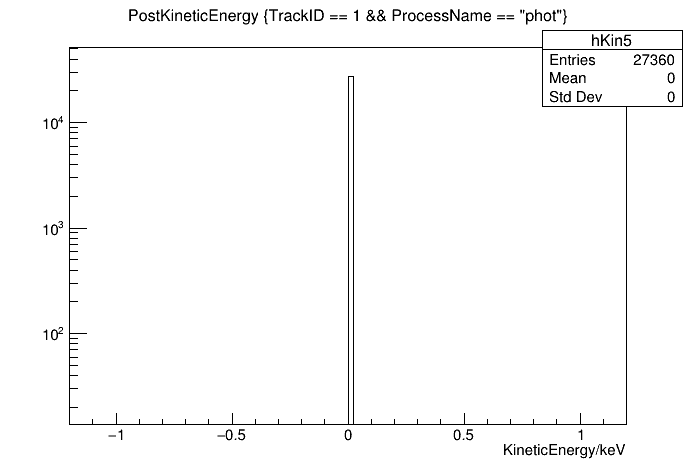

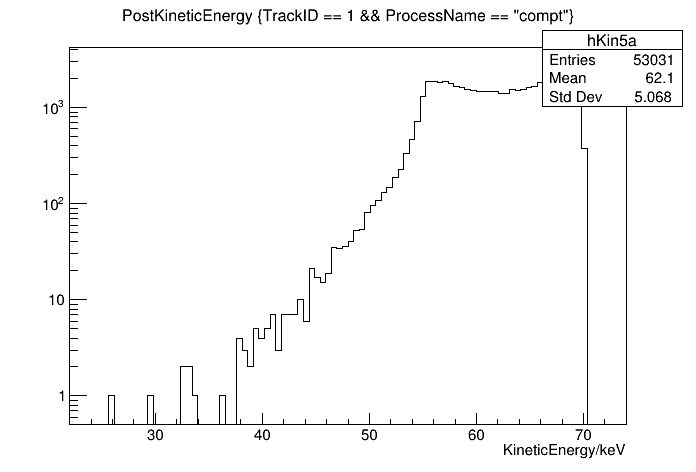

In [14]:
c11 = ROOT.TCanvas()
c11.SetLogy()
file.Hits.Draw("PostKineticEnergy>>hKin5",'TrackID == 1 && ProcessName == "phot"',"")
hKin5 = ROOT.gDirectory.Get('hKin5')
hKin5.GetXaxis().SetTitle('KineticEnergy/keV')
c11.Draw()

c11a = ROOT.TCanvas()
c11a.SetLogy()
file.Hits.Draw("PostKineticEnergy>>hKin5a",'TrackID == 1 && ProcessName == "compt"',"")
hKin5a = ROOT.gDirectory.Get('hKin5a')
hKin5a.GetXaxis().SetTitle('KineticEnergy/keV')
c11a.Draw()

### Scaterring angle

Compton angle calculated with the pre and post momentum angle

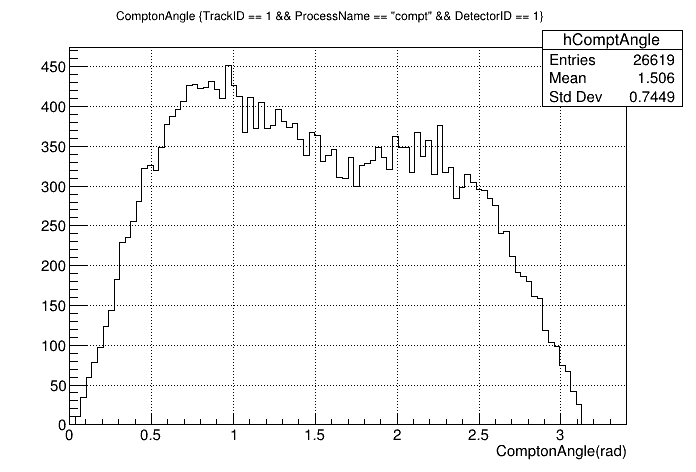

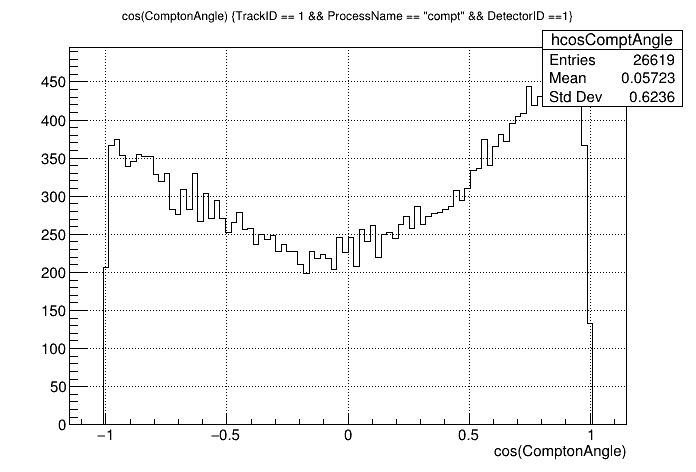

In [15]:
c12 = ROOT.TCanvas()
c12.SetGrid()
file.Hits.Draw("ComptonAngle>>hComptAngle",'TrackID == 1 && ProcessName == "compt" && DetectorID == 1',"")
hComptAngle = ROOT.gDirectory.Get('hComptAngle')
hComptAngle.GetXaxis().SetTitle('ComptonAngle(rad)')
c12.Draw()

c13 = ROOT.TCanvas()
c13.SetGrid()
file.Hits.Draw("cos(ComptonAngle)>>hcosComptAngle",'TrackID == 1 && ProcessName == "compt" && DetectorID ==1',"")
hcosComptAngle = ROOT.gDirectory.Get('hcosComptAngle')
hcosComptAngle.GetXaxis().SetTitle('cos(ComptonAngle)')
c13.Draw()

Calculatig cos(Theta) with compton formula cos(Theta) = 1-mc^2(1/Ef - 1/Ei)

mc^2 = 511 keV --> Electron mass

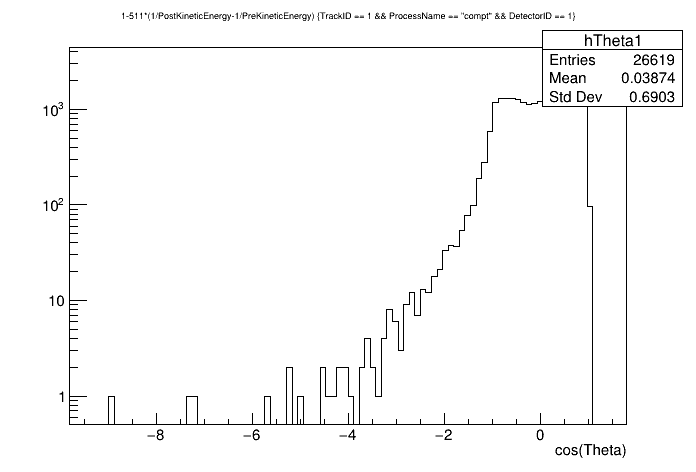

In [16]:
c14 = ROOT.TCanvas()
c14.SetLogy()
file.Hits.Draw("1-511*(1/PostKineticEnergy-1/PreKineticEnergy)>>hTheta1",'TrackID == 1 && ProcessName == "compt" && DetectorID == 1',"")
hTheta1 = ROOT.gDirectory.Get('hTheta1')
hTheta1.GetXaxis().SetTitle('cos(Theta)')
c14.Draw()

cos Theta < -1 -->  Something wrong. Probably the mass assumption.

Then use the ComptonAngle (known) and kinetic energies to calculate mass distribution

m = (1/cos(Theta))/(1/Efin-1/Eini)

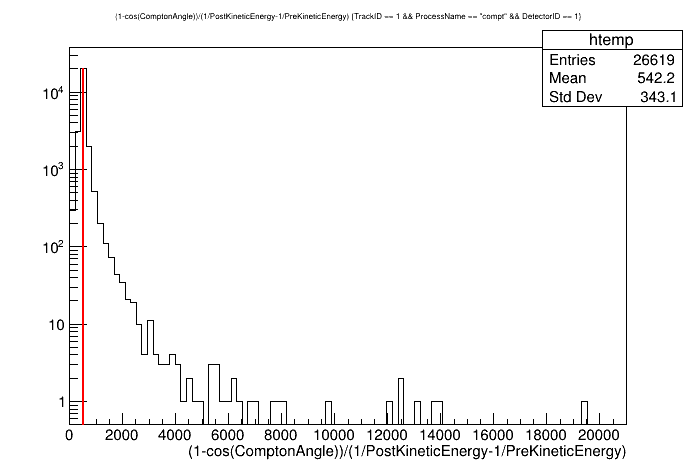

In [17]:
c15 = ROOT.TCanvas()
c15.SetLogy()
file.Hits.Draw("(1-cos(ComptonAngle))/(1/PostKineticEnergy-1/PreKineticEnergy)",'TrackID == 1 && ProcessName == "compt" && DetectorID == 1',"")
# Vertical line at 511 = electron mass
line = ROOT.TLine(511,0,511,2e4)
line.SetLineColor(2)
line.SetLineWidth(2)
line.Draw()
c15.Draw()

### Time

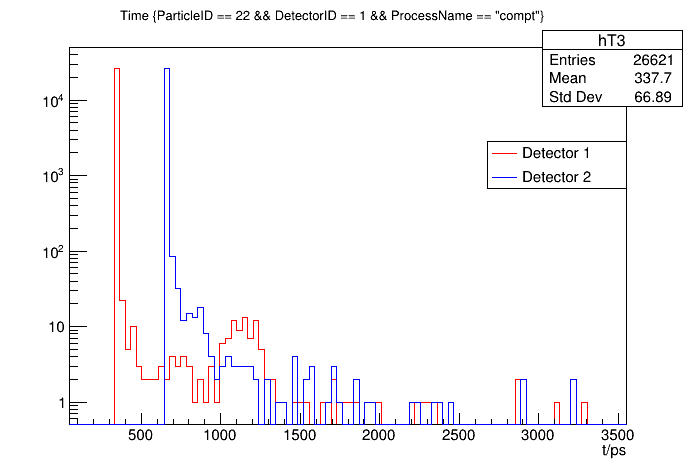

In [18]:

c10c = ROOT.TCanvas()
c10c.SetLogy()
file.Hits.Draw("Time>>hT3", 'ParticleID == 22 && DetectorID == 1 && ProcessName == "compt"',"")
file.Hits.Draw("Time>>hT4", 'ParticleID == 22 && DetectorID == 2 && ProcessName == "compt"',"same")
hT3 = ROOT.gDirectory.Get("hT3")
hT4 = ROOT.gDirectory.Get("hT4")
hT3.GetXaxis().SetTitle('t/ps')
hT3.SetLineColor(2)
hT3.Draw()
hT4.SetLineColor(4)
hT4.Draw("same")

legend = ROOT.TLegend(0.7,0.6,0.9,0.7)
legend.AddEntry(hT3,"Detector 1","l")
legend.AddEntry(hT4,"Detector 2","l")
legend.Draw()
c10c.Draw()


I don't understand why do we have a peak at 1000ps for detector 1

Explore the "normal" part of the detector 1 to get the time of arrival. 

$$
t_1 = detector_{distance}[1] * c
$$

Also a dispersion is expected due to the thickness of the detector and because the different interactions happens at differents depths of the detector

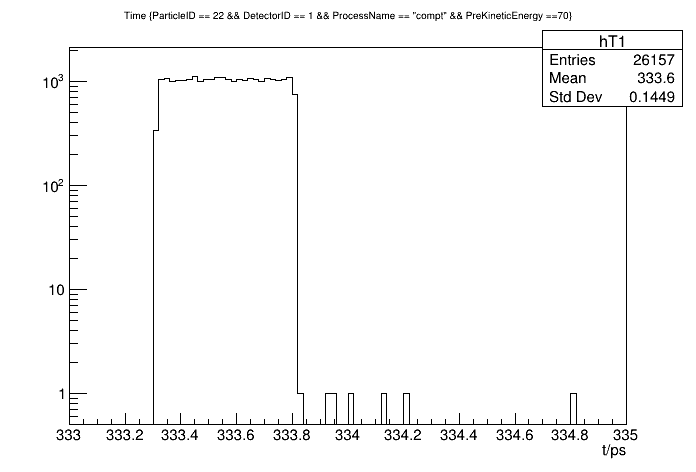

In [19]:
c10a = ROOT.TCanvas()
c10a.SetLogy()
file.Hits.Draw("Time>>hT1(100,333,335)", 'ParticleID == 22 && DetectorID == 1 && ProcessName == "compt" && PreKineticEnergy ==70',"")
hT1 = ROOT.gDirectory.Get("hT1")
hT1.GetXaxis().SetTitle('t/ps')
c10a.Draw()

$ t_1 \approx 333.5$ ps 

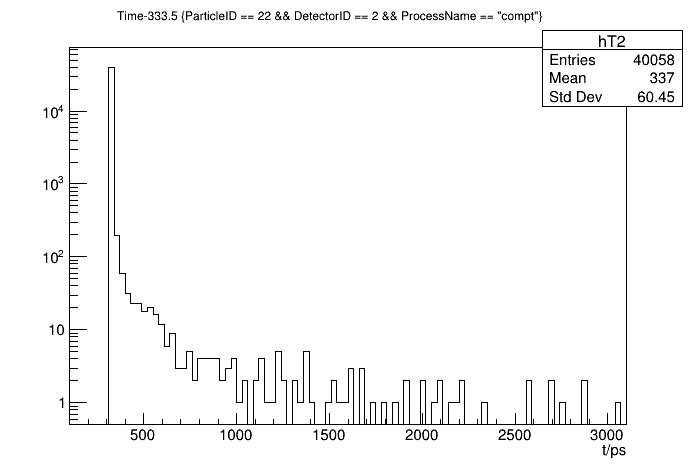

In [26]:
c10b = ROOT.TCanvas()
c10b.SetLogy()
file.Hits.Draw("Time-333.5>>hT2", 'ParticleID == 22 && DetectorID == 2',"")
hT2 = ROOT.gDirectory.Get("hT2")
hT2.GetXaxis().SetTitle('t/ps')
c10b.Draw()

Knowing the velocity ($c$) it is possible to relate the time with the distance traveled.

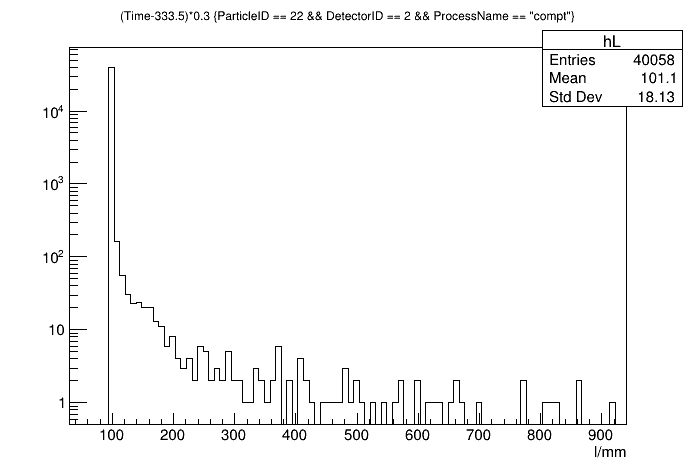

In [27]:
c10c = ROOT.TCanvas()
c10c.SetLogy()
file.Hits.Draw("(Time-333.5)*0.3>>hL", 'ParticleID == 22 && DetectorID == 2',"")
hL = ROOT.gDirectory.Get("hL")
hL.GetXaxis().SetTitle('l/mm')
c10c.Draw()

Now it is possible to calculate the scattered angle knowing that both detectors are separated 100 mm
$$
\cos\Theta = \frac{100mm}{\Delta l}
$$

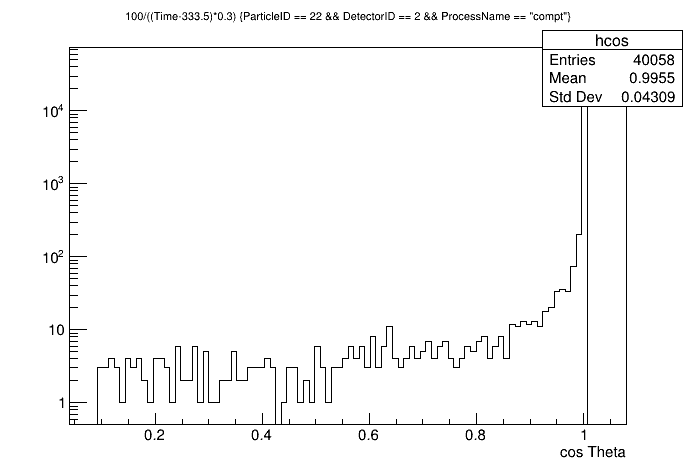

In [28]:
c10d = ROOT.TCanvas()
c10d.SetLogy()
file.Hits.Draw("100/((Time-333.5)*0.3)>>hcos", 'ParticleID == 22 && DetectorID == 2',"")
hcos = ROOT.gDirectory.Get("hcos")
hcos.GetXaxis().SetTitle('cos Theta')
c10d.Draw()

Not obtained same results than in the compton angle part.

Only possitive values of $\cos\theta$ because it is calculated using the smallest angle without taking into account the sign